In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [22]:

# Convert TotalCharges to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Simplify target column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [23]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [24]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


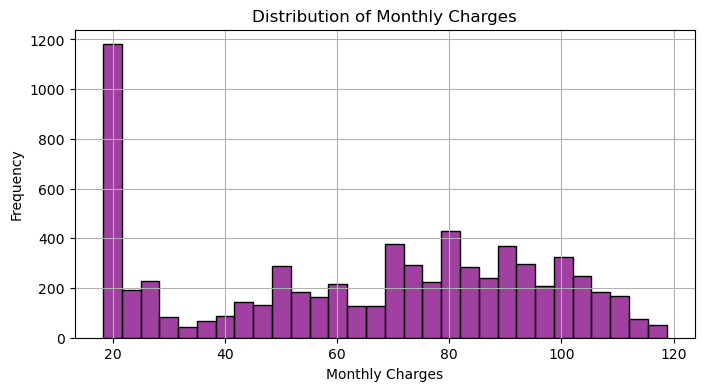

In [25]:
#histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['MonthlyCharges'], bins=30, color='purple')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

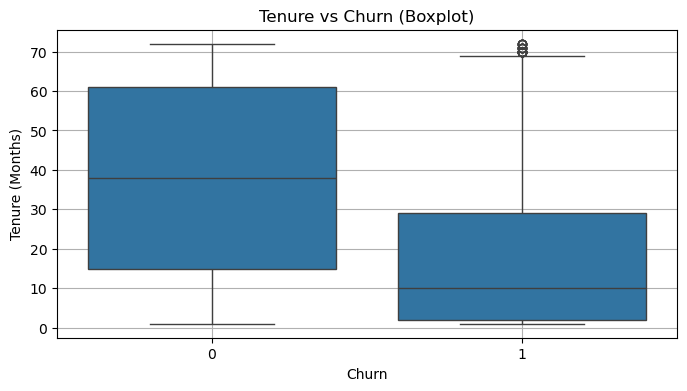

In [26]:
#Boxplot of Tenure
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure vs Churn (Boxplot)")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.grid(True)
plt.show()

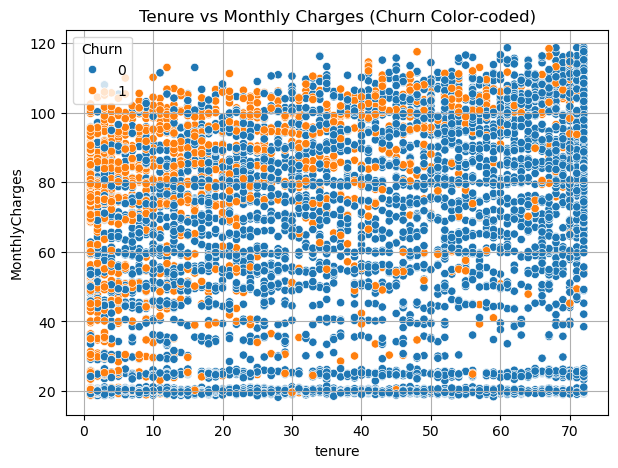

In [27]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title("Tenure vs Monthly Charges (Churn Color-coded)")
plt.grid(True)
plt.show()

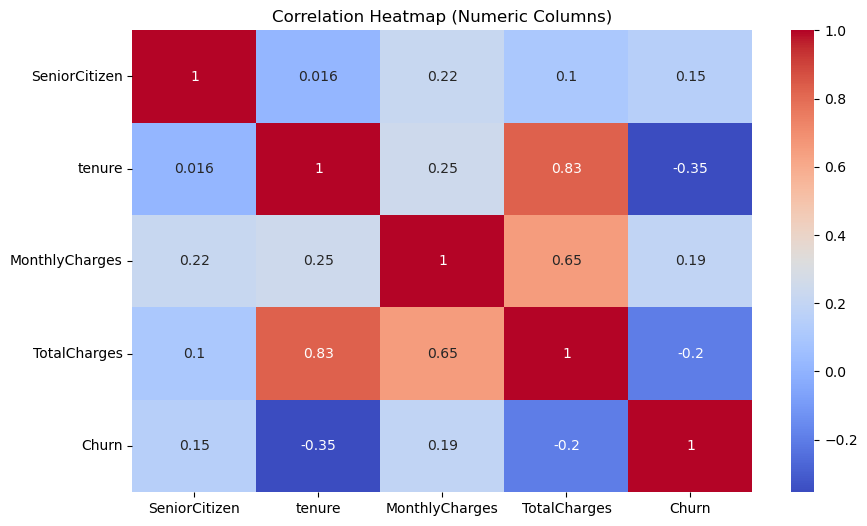

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

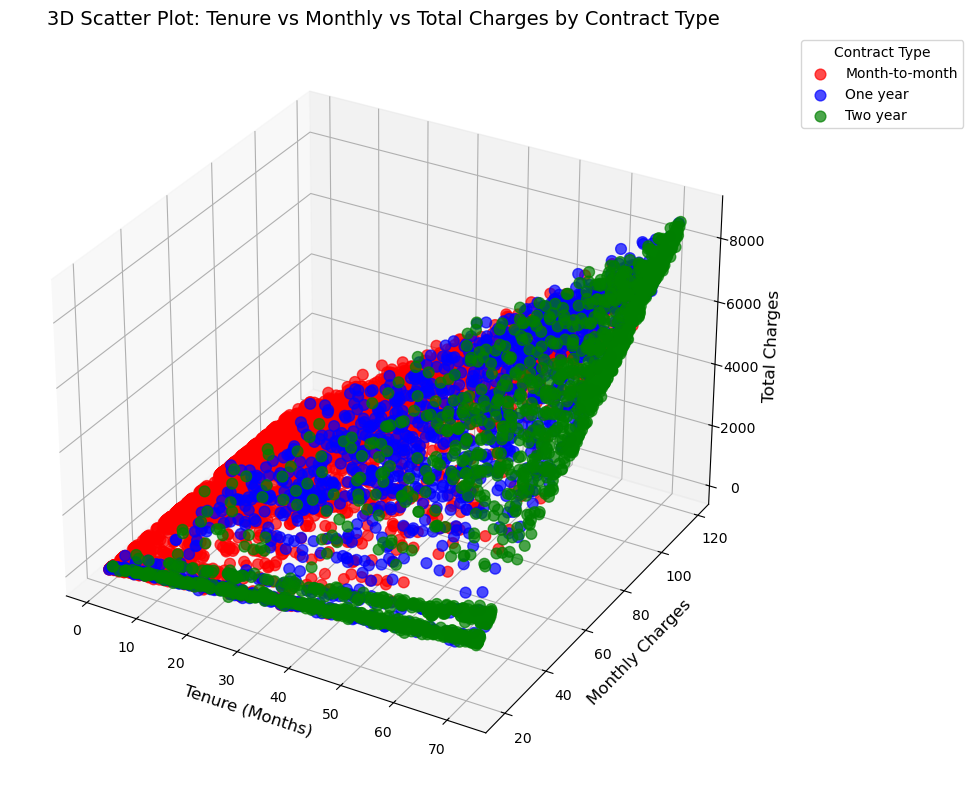

In [34]:
# Clean the data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Set up 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to each contract type
colors = ['red', 'blue', 'green', 'orange', 'purple']
contracts = df['Contract'].unique()

# Plot each contract group in a different color
for i, contract_type in enumerate(contracts):
    data = df[df['Contract'] == contract_type]
    scatter = ax.scatter(
        data['tenure'],
        data['MonthlyCharges'],
        data['TotalCharges'],
        color=colors[i % len(colors)],
        label=contract_type,
        s=60,
        alpha=0.7
    )

# Set labels and title
ax.set_xlabel('Tenure (Months)', fontsize=12)
ax.set_ylabel('Monthly Charges', fontsize=12)
ax.set_zlabel('Total Charges', fontsize=12)
ax.set_title('3D Scatter Plot: Tenure vs Monthly vs Total Charges by Contract Type', fontsize=14)

# Add legend
ax.legend(title='Contract Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()